## Dogs vs. Cats Classification

Select free T4 GPU in Runtime settings

## Download data

In [9]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG

Downloading...
From (original): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG
From (redirected): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG&confirm=t&uuid=21ac70a8-589f-4fcc-b111-5e633c125231
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:11<00:00, 72.8MB/s]


In [10]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_file:
    zip_file.extractall('data/')

In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths
base_dir = 'data/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

# Create directories
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)

# Split data
filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))

## Create data generators

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Create basic CNN classification model

In [13]:
from tensorflow.keras import models, layers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train basic model

In [14]:
history_model_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.6073 - loss: 0.6413 - val_accuracy: 0.7558 - val_loss: 0.4960
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7665 - loss: 0.4839 - val_accuracy: 0.7864 - val_loss: 0.4496
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8262 - loss: 0.3878 - val_accuracy: 0.8328 - val_loss: 0.3813
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8691 - loss: 0.3049 - val_accuracy: 0.8336 - val_loss: 0.3766
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9033 - loss: 0.2324 - val_accuracy: 0.8548 - val_loss: 0.3769
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9453 - loss: 0.1460 - val_accuracy: 0.8316 - val_loss: 0.4982
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9725 - loss: 0.0745 - val_accuracy: 0.8382 - val_loss: 0.5417
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9843 - loss: 0.0469 - val_accurac

## Plot accuracy and loss

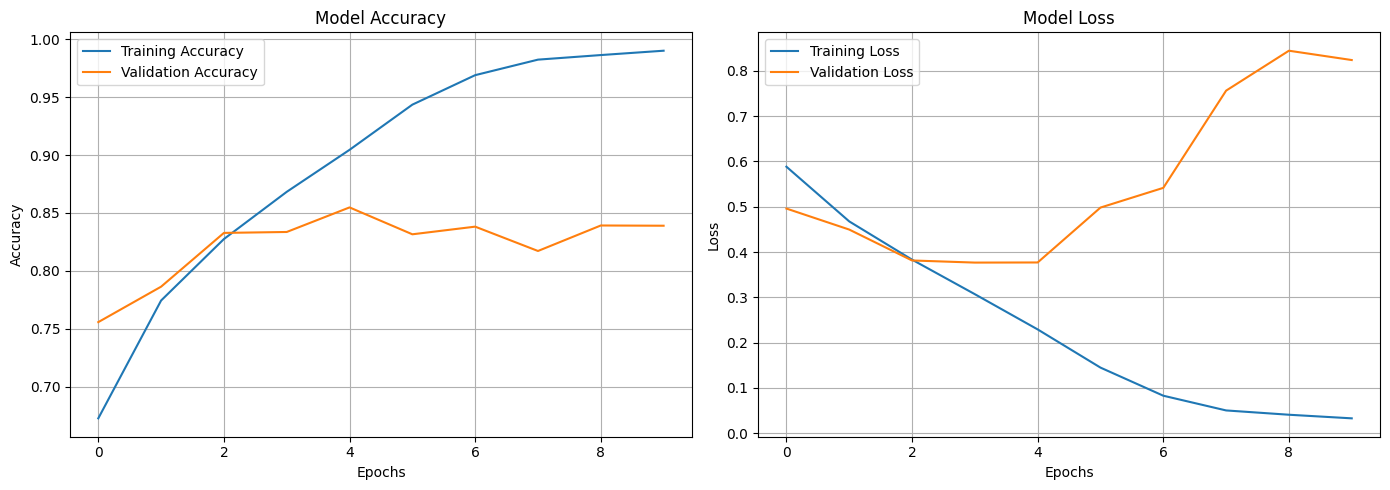

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('/content/baseline_accuracy_loss.png')
plt.show()


## Add regularizations

Add different regularization methods as described in the lab instructions and evaluate results.

### Dropout Regularization

In [16]:
from tensorflow.keras import models, layers

# Build the model
model_dropout = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_dropout.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


#### Train Dropout model

In [17]:
history_model_dropout = model_dropout.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.5590 - loss: 0.6943 - val_accuracy: 0.6920 - val_loss: 0.5712
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.6900 - loss: 0.5814 - val_accuracy: 0.7076 - val_loss: 0.5681
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7222 - loss: 0.5408 - val_accuracy: 0.7792 - val_loss: 0.4657
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7671 - loss: 0.4828 - val_accuracy: 0.8002 - val_loss: 0.4383
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.7942 - loss: 0.4426 - val_accuracy: 0.7914 - val_loss: 0.4393
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.8233 - loss: 0.3926 - val_accuracy: 0.8196 - val_loss: 0.4114
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8285 - loss: 0.3782 - val_accuracy: 0.8374 - val_loss: 0.3850
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8536 - loss: 0.3412 - 

#### Plot accuracy and loss

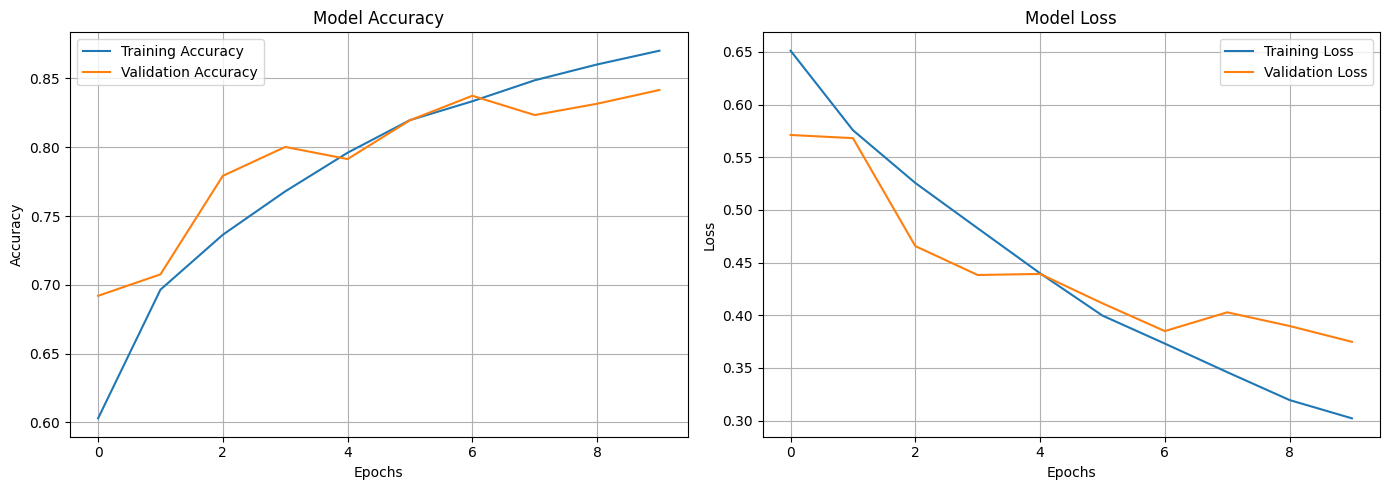

In [54]:
import matplotlib.pyplot as plt

# Create a wide figure for side-by-side plots
plt.figure(figsize=(14, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history_model_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_model_dropout.history['loss'], label='Training Loss')
plt.plot(history_model_dropout.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('/content/dropout_accuracy_loss.png')
plt.show()


### L2 Weight Regularization

In [19]:
from tensorflow.keras import regularizers

model_l2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

model_l2.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


#### Train L2 model

In [20]:
history_l2 = model_l2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.5866 - loss: 0.7623 - val_accuracy: 0.7344 - val_loss: 0.5590
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7343 - loss: 0.5664 - val_accuracy: 0.7548 - val_loss: 0.5352
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.7676 - loss: 0.5241 - val_accuracy: 0.7872 - val_loss: 0.5011
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.7840 - loss: 0.4994 - val_accuracy: 0.7974 - val_loss: 0.4876
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8110 - loss: 0.4692 - val_accuracy: 0.7986 - val_loss: 0.5177
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8243 - loss: 0.4496 - val_accuracy: 0.8164 - val_loss: 0.4682
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.8356 - loss: 0.4352 - val_accuracy: 0.8206 - val_loss: 0.4646
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.8415 - loss: 0.4273 - 

#### Plot accuracy and loss

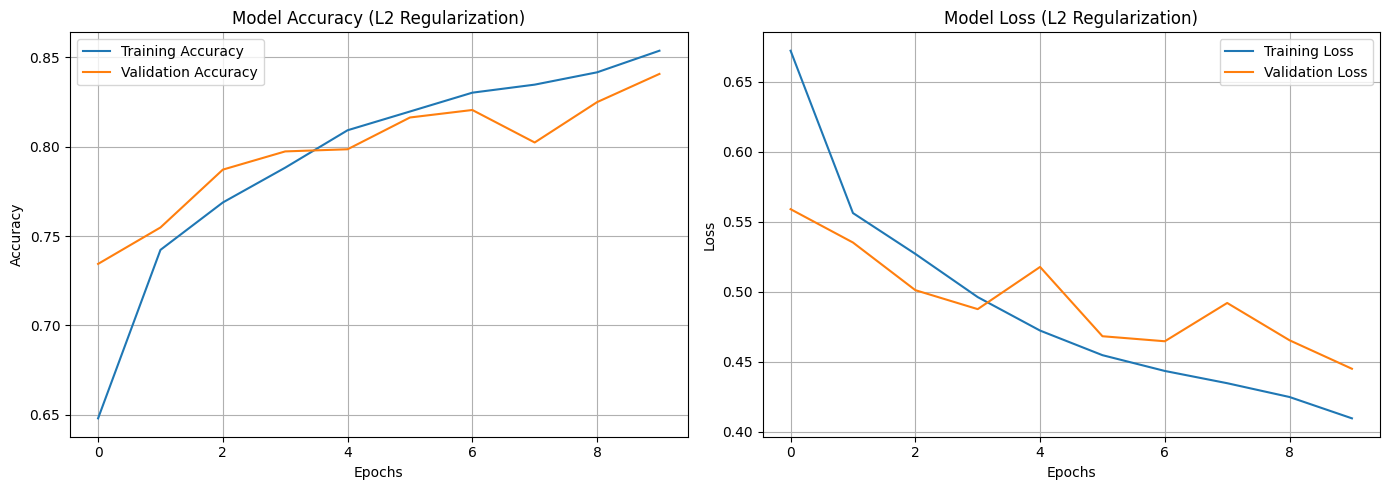

In [55]:
import matplotlib.pyplot as plt

# Create a wide figure for side-by-side plots
plt.figure(figsize=(14, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (L2 Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (L2 Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('/content/l2_accuracy_loss.png')
plt.show()

### Combination of Dropout and L2

#### Combo 1

In [25]:
from tensorflow.keras import models, layers, regularizers

model_combo1 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_combo1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


#### Train Combo 1

In [26]:
history_combo1 = model_combo1.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.5096 - loss: 0.9136 - val_accuracy: 0.4990 - val_loss: 0.7192
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.4942 - loss: 0.7122 - val_accuracy: 0.4990 - val_loss: 0.6999
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.5028 - loss: 0.6986 - val_accuracy: 0.4990 - val_loss: 0.6956
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.4967 - loss: 0.6953 - val_accuracy: 0.4990 - val_loss: 0.6944
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.5060 - loss: 0.6942 - val_accuracy: 0.5010 - val_loss: 0.6938
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.4967 - loss: 0.6938 - val_accuracy: 0.4990 - val_loss: 0.6935
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.4997 - loss: 0.6935 - val_accuracy: 0.4990 - val_loss: 0.6933
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.4989 - loss: 0.6933 - 

#### Combo 2

In [27]:
model_combo2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_combo2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


#### Train Combo 2

In [28]:
history_combo2 = model_combo2.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.5193 - loss: 1.0622 - val_accuracy: 0.5430 - val_loss: 0.7058
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.5410 - loss: 0.7009 - val_accuracy: 0.5726 - val_loss: 0.6942
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.5696 - loss: 0.6922 - val_accuracy: 0.6056 - val_loss: 0.6807
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.5871 - loss: 0.6834 - val_accuracy: 0.6120 - val_loss: 0.6800
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.5889 - loss: 0.6836 - val_accuracy: 0.6140 - val_loss: 0.6795
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.5884 - loss: 0.6826 - val_accuracy: 0.5980 - val_loss: 0.6817
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5984 - loss: 0.6822 - val_accuracy: 0.6168 - val_loss: 0.6695
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.5987 - loss: 0.6772 - 

#### Plot accuracy and loss

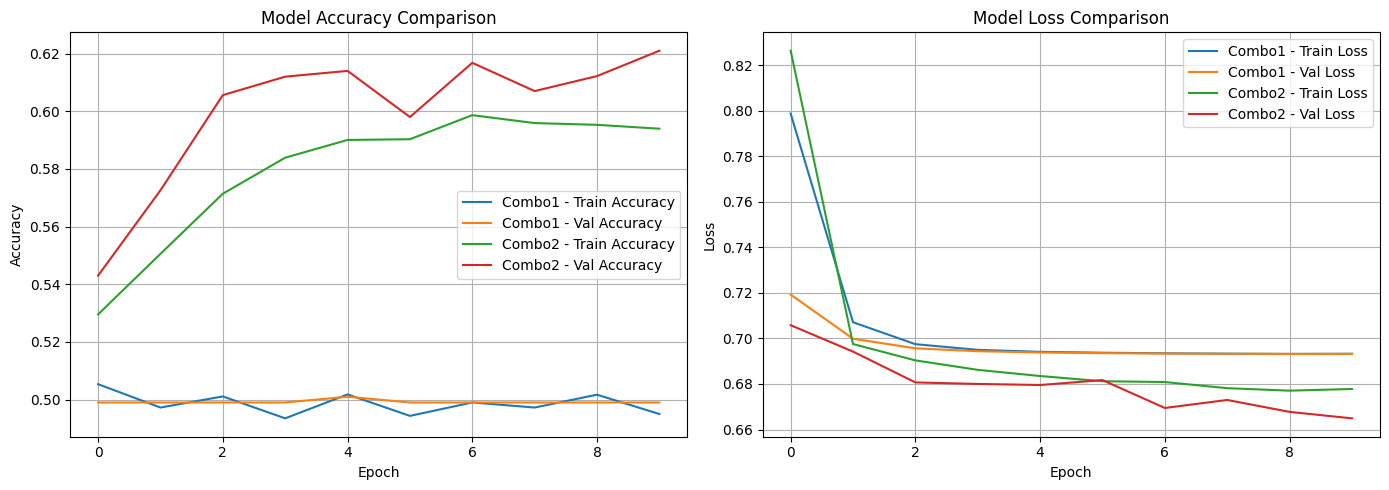

In [57]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_combo1.history['accuracy'], label='Combo1 - Train Accuracy')
plt.plot(history_combo1.history['val_accuracy'], label='Combo1 - Val Accuracy')
plt.plot(history_combo2.history['accuracy'], label='Combo2 - Train Accuracy')
plt.plot(history_combo2.history['val_accuracy'], label='Combo2 - Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_combo1.history['loss'], label='Combo1 - Train Loss')
plt.plot(history_combo1.history['val_loss'], label='Combo1 - Val Loss')
plt.plot(history_combo2.history['loss'], label='Combo2 - Train Loss')
plt.plot(history_combo2.history['val_loss'], label='Combo2 - Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('/content/combo_accuracy_loss.png')
plt.show()


### Early Stopping

In [30]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the basic model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Create EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


#### Train Early Stopping model

In [31]:
history_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.5869 - loss: 0.6707 - val_accuracy: 0.7426 - val_loss: 0.5136
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7577 - loss: 0.4893 - val_accuracy: 0.7886 - val_loss: 0.4434
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8206 - loss: 0.3950 - val_accuracy: 0.8180 - val_loss: 0.4137
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.8597 - loss: 0.3150 - val_accuracy: 0.8418 - val_loss: 0.3753
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9122 - loss: 0.2118 - val_accuracy: 0.8314 - val_loss: 0.4115
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9530 - loss: 0.1258 - val_accuracy: 0.8338 - val_loss: 0.4581
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9787 - loss: 0.0654 - val_accuracy: 0.8368 - val_loss: 0.6215


#### Plot accuracy and loss

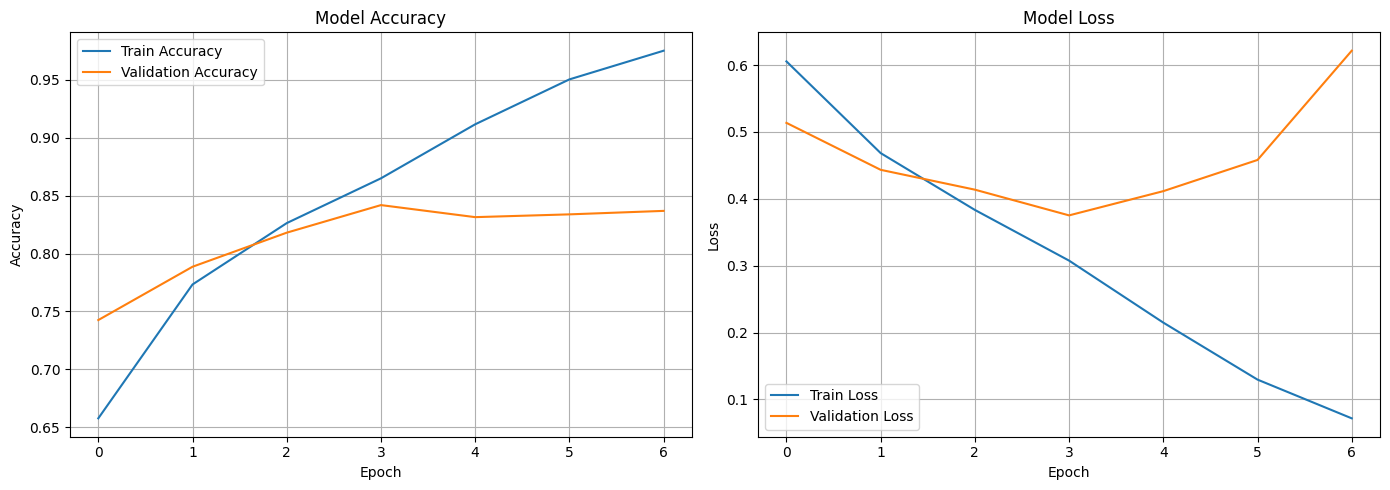

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_basic.history['accuracy'], label='Train Accuracy')
plt.plot(history_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_basic.history['loss'], label='Train Loss')
plt.plot(history_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('/content/earlystopping_accuracy_loss.png')
plt.show()


### Data Augmentation

In [33]:
# 1. Data Augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# 2. Validation set remains unchanged (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# 3. Load augmented training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# 4. Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [34]:
from tensorflow.keras import models, layers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#### Train Data Augmentation model

In [35]:
history_augmented = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 218ms/step - accuracy: 0.5663 - loss: 0.6905 - val_accuracy: 0.7072 - val_loss: 0.5755
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 215ms/step - accuracy: 0.6710 - loss: 0.6063 - val_accuracy: 0.7454 - val_loss: 0.5218
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.7223 - loss: 0.5426 - val_accuracy: 0.7900 - val_loss: 0.4533
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 218ms/step - accuracy: 0.7484 - loss: 0.5052 - val_accuracy: 0.8040 - val_loss: 0.4232
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.7773 - loss: 0.4762 - val_accuracy: 0.7902 - val_loss: 0.4632
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 217ms/step - accuracy: 0.7816 - loss: 0.4559 - val_accuracy: 0.7600 - val_loss: 0.5029
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 215ms/step - accuracy: 0.8034 - loss: 0.4315 - val_accuracy: 0.8604 - val_loss: 0.3423
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 221ms/step - accuracy: 0.8159 -

#### Plot accuracy and loss

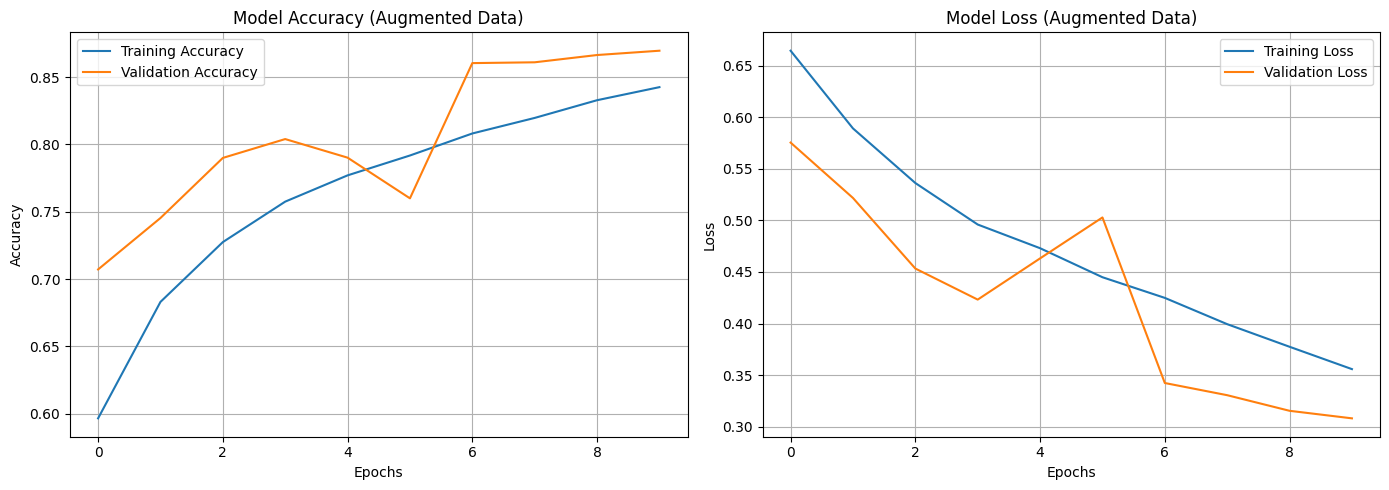

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Augmented Data)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'], label='Training Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Augmented Data)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('/content/augmentation_accuracy_loss.png')
plt.show()


#### Confusion Matrix

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step


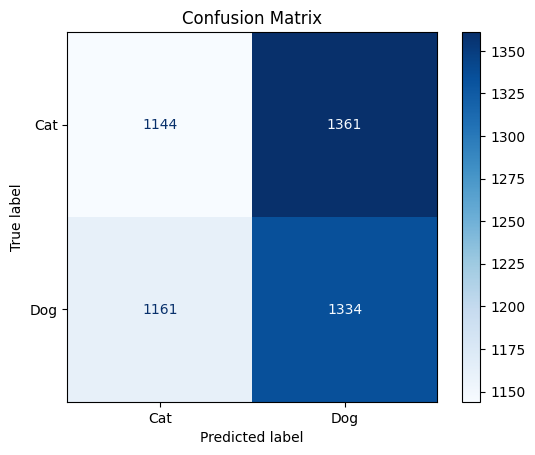

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

val_generator.reset()
y_true = val_generator.classes
y_pred_probs = model_basic.predict(val_generator)  # Replace with your final model
y_pred = (y_pred_probs > 0.5).astype("int32")

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')
plt.show()

files.download('confusion_matrix.png')


#### Misclassified Samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


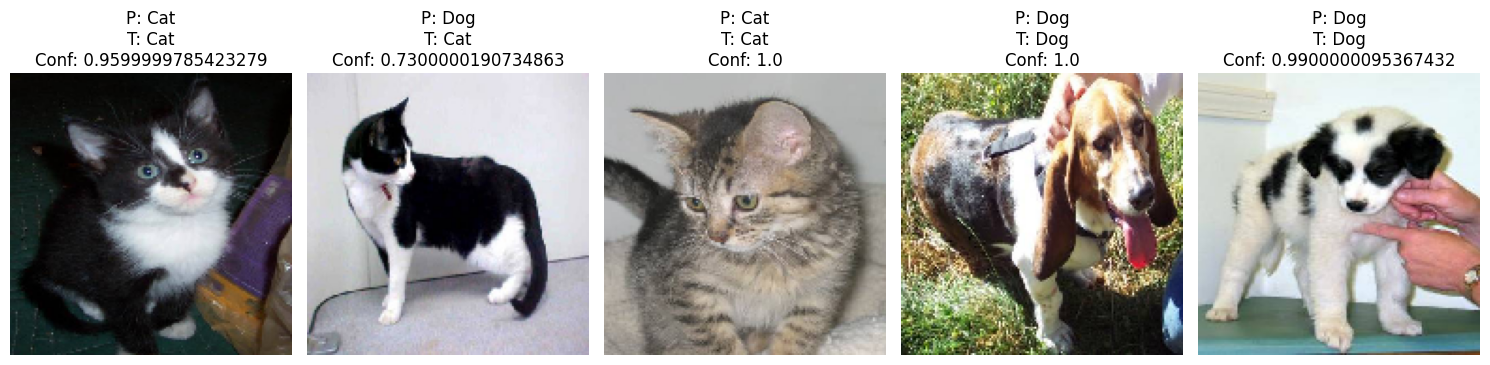

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
# Get misclassified samples
misclassified = np.where(y_pred.flatten() != y_true)[0]

# Plot 5 misclassified samples
plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified[:5]):
    img, label = val_generator[idx]
    pred = model_basic.predict(img)[0][0]
    predicted_label = 'Dog' if pred > 0.5 else 'Cat'
    true_label = 'Dog' if label[0] == 1 else 'Cat'
    confidence = round(pred if pred > 0.5 else 1 - pred, 2)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img[0])
    plt.axis('off')
    plt.title(f"P: {predicted_label}\nT: {true_label}\nConf: {confidence}")

plt.tight_layout()
plt.savefig('misclassified_samples.png')
plt.show()

files.download('misclassified_samples.png')
